# Assignment 2: Milestone I Natural Language Processing
## Task 1. Basic Text Pre-processing
#### Student Name: Sowmiya Kumar
#### Student ID: s4040536


Environment: Python 3 and Jupyter notebook

Libraries used: please include all the libraries you used in your assignment, e.g.,:
* pandas
* re
* numpy
* nltk
* matplotlib
* os
* itertools

## Introduction

The task1 is focusing on the initial stages of Natural Language Processing (NLP) for the clothing review dataset. The primary objective of this task is to perform a series of pre-processing steps on the customer reviews to prepare the data for further analysis and modeling. These pre-processing steps are essential for transforming raw text data into a structured format that machine learning models can efficiently interpret.

The key steps involved in this task include:

* Tokenization: Breaking down the raw text into individual tokens or words.
* Case normalisation: Converting all text to lowercase for uniformity.
* Removal of Short Words: Excluding words with less than two characters as they typically do not contribute to meaningful insights.
* Stop Word Removal: Eliminating common words (e.g., 'the', 'is') that carry little semantic meaning in the context of the reviews.
* Term Frequency Filtering: Removing words that appear only once across the entire document collection.
* Document Frequency Filtering: Identifying and excluding the top 20 most frequent words across the dataset.

By the end of this task, the reviews will be transformed into a cleaned, tokenized format, allowing for more effective analysis. The processed data will be saved as a new CSV file with an additional column containing the tokenized reviews. Additionally, a vocabulary file will be generated, listing each unique word and its corresponding index in the dataset. This vocabulary will be crucial for interpreting the sparse encoding of the tokenized reviews in subsequent tasks.

## Importing libraries 

In [3]:
# Code to import libraries as you need in this assessment, e.g.,
import nltk
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1.1 Examining and loading data
- Examine the data and explain your findings
- Load the data into proper data structures and get it ready for processing.

In [5]:
# Loading data
data = pd.read_csv('assignment3.csv')
data.head()  #displaying first 5 rows

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits


The dataset is provided in csv format, which is then loaded using the pandas read_csv function and stored as a dataframe

In [7]:
# Dimension of the dataset
data.shape

(19662, 10)

In [8]:
# concise summary of dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19662 entries, 0 to 19661
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              19662 non-null  int64 
 1   Age                      19662 non-null  int64 
 2   Title                    19662 non-null  object
 3   Review Text              19662 non-null  object
 4   Rating                   19662 non-null  int64 
 5   Recommended IND          19662 non-null  int64 
 6   Positive Feedback Count  19662 non-null  int64 
 7   Division Name            19662 non-null  object
 8   Department Name          19662 non-null  object
 9   Class Name               19662 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.5+ MB


The summary above shows that the dataset contains 10 columns and does not have any null values. It has an equal distribution of integer and object data types. The numerical columns, such as age and rating, are correctly stored as integers, while the text fields are stored as objects.

In [10]:
# statistical summary
data.describe()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,19662.000000,19662.000000,19662.000000,19662.000000,19662.000000
mean,921.297274,43.260808,4.183145,0.818177,2.652477
std,200.227528,12.258122,1.112224,0.385708,5.834285
min,1.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


The dataset statistical summary shows that the average reviewer is 43 years old, with ages ranging from 18 to 99, reflecting a wide customer base. Clothing items generally receive positive feedback, with an average rating of 4.18 out of 5, and 81.8% of reviews recommending the product. Positive feedback counts vary significantly, averaging 2.65 but ranging from 0 to 122, indicating some products receive much more attention than others. Overall, the data suggests a trend of high customer satisfaction.

### 1.2 Pre-processing data
Perform the required text pre-processing steps.

The primary objective of this step is to clean and refine the "Review Text" by applying various techniques, such as tokenization, converting all words to lowercase, and removing insignificant words, including stopwords and infrequent terms.

In [14]:
#Filtering Review Text column
review_data = data['Review Text']
review_data

0        I had such high hopes for this dress and reall...
1        I love, love, love this jumpsuit. it's fun, fl...
2        This shirt is very flattering to all due to th...
3        I love tracy reese dresses, but this one is no...
4        I aded this in my basket at hte last mintue to...
                               ...                        
19657    I was very happy to snag this dress at such a ...
19658    It reminds me of maternity clothes. soft, stre...
19659    This fit well, but the top was very see throug...
19660    I bought this dress for a wedding i have this ...
19661    This dress in a lovely platinum is feminine an...
Name: Review Text, Length: 19662, dtype: object

In [15]:
#Ensuring if all values in the review text column is text and not null
review_data.apply(lambda x: isinstance(x, str) and not pd.isna(x)).value_counts()

Review Text
True    19662
Name: count, dtype: int64

#### Tokenization and Case Normalisation

In [17]:
#Method to tokenize and pre process data (step 2)
def tokenize_review(review):
   
    # Define the regex pattern
    pattern = r"[a-zA-Z]+(?:[-'][a-zA-Z]+)?"  # Match words with optional internal hyphens or apostrophes
    
    # Create a RegexpTokenizer using the pattern
    tokenizer = nltk.RegexpTokenizer(pattern)
    
    # Tokenize the review using the pattern
    tokenized_review = tokenizer.tokenize(review)
    
    return tokenized_review

In [18]:
# tokenizing all the reviews
tokenized_review = review_data.apply(lambda x: tokenize_review(str(x)))

The str(x) conversion ensures that any non-string values (like NaN, integers, or floats) in the "Review Text" column are treated as strings, preventing errors when the preprocess_review function processes the data. Additionally, converting all inputs to strings maintains consistency across rows, avoiding issues if the data contains mixed types.

In [20]:
tokenized_review.head()

0    [I, had, such, high, hopes, for, this, dress, ...
1    [I, love, love, love, this, jumpsuit, it's, fu...
2    [This, shirt, is, very, flattering, to, all, d...
3    [I, love, tracy, reese, dresses, but, this, on...
4    [I, aded, this, in, my, basket, at, hte, last,...
Name: Review Text, dtype: object

Case normalization is a simple yet effective process commonly performed after tokenization. After tokenization, words may appear in both uppercase and lowercase forms. While mixed case is often used in English texts to differentiate between nouns, proper nouns, and the start of sentences, most text analysis tasks focus on the meaning of words. To ensure consistency, an uppercase word is typically treated the same as its lowercase counterpart. A common strategy for achieving this is to convert all letters in a word to lowercase.se.

In [22]:
#Case normalisation
from itertools import chain

# Count tokens before converting to lowercase
tokens_before_lower = list(chain.from_iterable(tokenized_review))
print("the original number of tokens:", len(tokens_before_lower))
print("the original number of unique tokens:", len(set(tokens_before_lower)))
# Convert the tokenized review text to lowercase
tokenized_review = tokenized_review.apply(lambda tokens: [token.lower() for token in tokens])
# Count tokens after converting to lowercase
tokens_after_lower = list(chain.from_iterable(tokenized_review))
print("the number of distinct tokens after case normalisation:", len(set(tokens_after_lower)))

the original number of tokens: 1206688
the original number of unique tokens: 15402
the number of distinct tokens after case normalisation: 14806


The original dataset contained 1,206,688 tokens, with 15,402 unique tokens before any case normalization. After converting the tokens to lowercase, the number of distinct tokens reduced slightly to 14,806. This reduction of around 596 tokens suggests that there were several instances of words that appeared in both uppercase and lowercase forms, which were unified after case normalization. This process helped consolidate variations in capitalization, leading to a more uniform and compact vocabulary.

#### A Few Statistics Before Any Further Pre-processing

'stats_print' is a function to calculate and display statistics for the "Review Text" column before processing the data. The function will compute the following:
* Vocabulary size: The number of unique tokens in the dataset.
* Total number of tokens: The total number of words/tokens in the dataset.
* Lexical diversity: The ratio of unique tokens (vocabulary size) to the total number of tokens.
* Total number of articles: The number of reviews in the dataset.
* Average document length: The average number of tokens per review.
* Maximum and Minimum document length: The longest and shortest review in terms of token count.
* Standard deviation of document length: Measures variation in review length.essing.

In [25]:

# Define the function to print the stats
def stats_print(tokenized_review):
    # Flatten the list of lists into a single list of words
    words = list(chain.from_iterable(tokenized_review))
    # Create a set of unique words (vocabulary)
    vocab = set(words)
    
    # Calculate lexical diversity
    lexical_diversity = len(vocab) / len(words) if len(words) > 0 else 0
    
    # Print statistics
    print("Vocabulary size:", len(vocab))
    print("Total number of tokens:", len(words))
    print("Lexical diversity:", lexical_diversity)
    print("Total number of reviews:", len(tokenized_review))
    
    # Document lengths (number of tokens per review)
    lens = [len(review) for review in tokenized_review]
    
    # Print document length statistics
    print("Average document length:", np.mean(lens))
    print("Maximum document length:", np.max(lens))
    print("Minimum document length:", np.min(lens))
    print("Standard deviation of document length:", np.std(lens))


In [26]:
# Print the statistics for the tokenized reviews
print("Initial statistics\n") 
stats_print(tokenized_review)

Initial statistics

Vocabulary size: 14806
Total number of tokens: 1206688
Lexical diversity: 0.012269948818584423
Total number of reviews: 19662
Average document length: 61.37157969687723
Maximum document length: 113
Minimum document length: 2
Standard deviation of document length: 27.802596969841698


#### Removing stopwords, less frequesnt words and 20 most frequent words

##### Removing words with length less than 2
Short words often contribute little to the overall meaning of the text and can introduce noise into the analysis. By eliminating these brief tokens, we focus more on meaningful words that provide greater value for text classification tasks.

In [29]:
# Count of tokens before removing short words
token_count = list(chain.from_iterable(tokenized_review))
print("Total tokens before removing short words:", len(token_count))

# Remove words with length less than 2
tokenized_review = tokenized_review.apply(lambda tokens: [word for word in tokens if len(word) >= 2])

# Count of tokens after removing short words
token_count_post = list(chain.from_iterable(tokenized_review))
print("Total tokens after removing short words:", len(token_count_post))

Total tokens before removing short words: 1206688
Total tokens after removing short words: 1109634


After removing words with a length of fewer than 2 characters, the total number of tokens decreased from 1,206,688 to 1,109,634, reflecting a reduction of 97,054 tokens. This indicates that a substantial portion of the original tokens consisted of short words, which likely contributed little to the overall meaning of the text. 

##### Removing stop words
Stop words are common words in a language that usually carry little significance for text analysis. These include words such as "and," "the," or "is." Since they contribute minimally to the overall meaning of a document, they are typically filtered out during pre-processing. The process, known as "stopping," helps reduce noise in the data and allows more focus on the meaningful terms that are important for natural language processing (NLP) tasks. The stop words are removed by checking them against a predefined list, in this case a text file.

In [32]:
#Load stopwords from stopwords_en.txt
with open('stopwords_en.txt', 'r') as f:
    stopword_list = f.read().splitlines()
stopword_set = set(stopword_list)  # Convert to set for efficient searching

I used splitlines() instead of split() because it specifically handles line breaks across different operating systems, ensuring consistent splitting whether the file uses \n, \r, or \r\n. Additionally, splitlines() preserves empty lines, which is important when working with files where blank lines may have significance, whereas split() would ignore them.

In [34]:
# Count of tokens before removing stopwords
token_count = list(chain.from_iterable(tokenized_review))
print("Total tokens before stopword removal:", len(token_count))

# Remove stopwords from the tokenized reviews
tokenized_review = tokenized_review.apply(lambda tokens: [word for word in tokens if word not in stopword_set])

# Count of tokens after removing stopwords
token_count_post = list(chain.from_iterable(tokenized_review))
print("Total tokens after stopword removal:", len(token_count_post))

Total tokens before stopword removal: 1109634
Total tokens after stopword removal: 452692


After removing stop words, the total number of tokens decreased significantly from 1,109,634 to 452,692, indicating that a substantial portion of the original tokens were common stop words.

##### Removing words appearing only once based on term frequency

In text analysis, identifying words that carry the most semantic meaning is crucial for understanding the content. A commonly used method is frequency distribution, which helps us see how often a word appears in a given corpus. Term frequency counts the number of times a word occurs across the entire collection of documents, without considering which specific document it appears in. By analyzing term frequency, it will be helpul to gain insights into how word tokens are distributed across the corpus, which helps focus on the most informative words.

The NLTK library provides a convenient function, FreqDist, to directly compute and visualize this distribution based on word tokens.
This step is to retain the most semantically significant words in the text by filtering out low-frequency words that are unlikely to contribute meaningful insights

In [37]:
words = list(chain.from_iterable(tokenized_review)) # put all the tokens in the corpus in a single list

In [38]:
from nltk.probability import *
# Calculate term frequency using FreqDist from NLTK
term_fd = FreqDist(words)  # term frequency distribution

In [39]:
# Remove words that appear only once in the corpus (term frequency = 1)
tokenized_review = tokenized_review.apply(lambda tokens: [word for word in tokens if term_fd[word] > 1])

# Count of tokens after removing words that occur only once
tokens_after_single_occurrence_removal = list(chain.from_iterable(tokenized_review))
print("Total tokens after removing single occurrence words:", len(tokens_after_single_occurrence_removal))


Total tokens after removing single occurrence words: 445958


In [40]:
term_fd.most_common(20)

[('dress', 9334),
 ('size', 7860),
 ('love', 7722),
 ('fit', 6582),
 ('top', 6542),
 ('wear', 5715),
 ('great', 5302),
 ('fabric', 4306),
 ('color', 4099),
 ('small', 4097),
 ('ordered', 3430),
 ('perfect', 3337),
 ('flattering', 3094),
 ('soft', 2953),
 ('back', 2880),
 ('nice', 2701),
 ('comfortable', 2692),
 ('bought', 2662),
 ('cute', 2604),
 ('bit', 2582)]

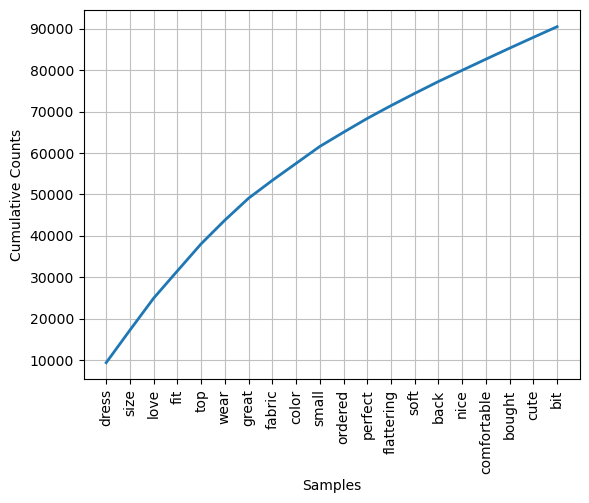

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

In [41]:
term_fd.plot(20, cumulative=True)

Most Frequent Words(term frequency): The most common words in the dataset include product-related terms like "dress" (9,334 occurrences), "size" (7,860), and "love" (7,722), which reflect the clothing and customer experience focus of the reviews. These words provide a strong indication of the themes discussed in the reviews, particularly related to product fit and satisfaction.

Frequency Distribution Plot(term frequency): The cumulative frequency plot shows the top 20 most frequent words and their cumulative counts. These 20 words account for a significant portion of the tokens, with a clear upward trend in cumulative frequency. This suggests that a relatively small set of common words dominates the corpus, which aligns with typical natural language patterns where a few words are used frequently while many others occur less often.

##### Removing the top 20 most frequent words based on document frequency

Document frequency differs from term frequency in that it measures how many documents a word appears in, rather than how many times it occurs overall. For instance, if a word appears multiple times within a single document, it still counts as one occurrence in document frequency. This helps focus on the distribution of words across documents, rather than their repetition within any single document.

Top 20 most frequent words (based on document frequency): [('love', 6416), ('size', 5888), ('fit', 5537), ('dress', 5346), ('wear', 4900), ('top', 4670), ('great', 4497), ('fabric', 3712), ('color', 3604), ('small', 3265), ('ordered', 3099), ('perfect', 2973), ('flattering', 2939), ('soft', 2805), ('comfortable', 2597), ('back', 2538), ('cute', 2398), ('fits', 2394), ('nice', 2393), ('bought', 2376)]


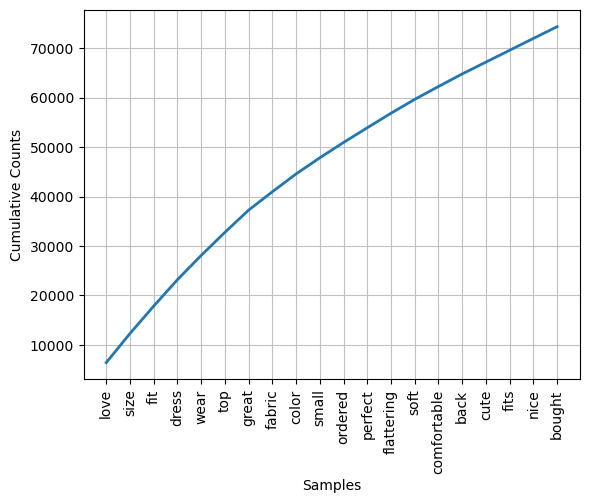

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

In [44]:
# Calculate document frequency for each word (how many documents the word appears in)
# Convert each tokenized review into a set to remove duplicate words within the same document
doc_freq_dist = FreqDist(chain.from_iterable(set(tokens) for tokens in tokenized_review))

# Display the top 20 most frequent words based on document frequency
top_20_most_frequent = doc_freq_dist.most_common(20)
print("Top 20 most frequent words (based on document frequency):", top_20_most_frequent)

# Plot the cumulative distribution of the top 20 most frequent words
doc_freq_dist.plot(20, cumulative=True)


Words like "love" (6,416 documents), "size" (5,888 documents), and "fit" (5,537 documents) are among the most common, reflecting common themes across many reviews. These terms likely relate to customer sentiments about product quality, size, and fit, which are key factors in clothing reviews.

In [46]:
# Remove the top 20 most frequent words from the tokenized reviews
top_20_words_to_remove = [word for word, _ in top_20_most_frequent]
tokenized_review = tokenized_review.apply(lambda tokens: [word for word in tokens if word not in top_20_words_to_remove])

# Count of tokens after removing top 20 most frequent words based on document frequency
tokens_after_doc_freq_removal = list(chain.from_iterable(tokenized_review))
print("Total tokens after removing top 20 most frequent words:", len(tokens_after_doc_freq_removal))

Total tokens after removing top 20 most frequent words: 355505


In both frequency analyses, several words, such as "dress," "size," "love," and "fit," appear frequently. However, there are differences in the emphasis each method places on these words.
* The term frequency plot reveals words like "dress" and "size" dominating the corpus, with the cumulative frequency showing that a small set of words account for a large portion of the total word occurrences. The most frequent words reflect common themes of product descriptions and sentiments, likely related to customer preferences and product attributes. These are words that occur multiple times within documents.
* The document frequency plot, on the other hand, shows how widely these words are spread across different documents. Words like "love" and "size" dominate in terms of document coverage, indicating that they appear in many different reviews. Document frequency highlights the words that consistently appear across various documents, rather than just within individual reviews.

#### Data Statistics After Pre-processing

In [49]:
stats_print(tokenized_review)

Vocabulary size: 7529
Total number of tokens: 355505
Lexical diversity: 0.021178323792914306
Total number of reviews: 19662
Average document length: 18.080815786796865
Maximum document length: 47
Minimum document length: 0
Standard deviation of document length: 8.833524535391433


Initial statistics

* Vocabulary size: 14806
* Total number of tokens: 1206688
* Lexical diversity: 0.012269948818584423
* Total number of reviews: 19662
* Average document length: 61.37157969687723
* Maximum document length: 113
* Minimum document length: 2
* Standard deviation of document length: 27.802596

After pre-processing, the vocabulary size decreased from 14,806 to 7,529, and the total token count dropped significantly from 1,206,688 to 355,505. Lexical diversity slightly improved, indicating a higher proportion of unique words. Average document length reduced from 61.37 to 18.08 tokens, and the standard deviation decreased, leading to more uniform review lengths.

## Saving required outputs
Save the requested information as per specification.
- vocab.txt

In [53]:
# Add the processed tokenized reviews as a new column
data['Processed_Review'] = tokenized_review

In [54]:
# Display rows where the 'Processed_Review' column is an empty list
empty_rows = data[data['Processed_Review'].apply(lambda x: len(x) == 0)]
print("Rows with empty 'Processed_Review':")
empty_rows

Rows with empty 'Processed_Review':


,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Processed_Review
4160,562,32,Very nice skirt but too small,I would have liked it but it was too small for...,4,1,1,General,Trend,Trend,[]
6521,820,50,Another beautiful white top,Great fit,5,1,0,General Petite,Tops,Blouses,[]
11211,927,36,Buy this!,Fits perfect!,5,1,0,General Petite,Tops,Sweaters,[]
11568,1078,37,Love,Love this dress and the color,5,1,1,General,Dresses,Dresses,[]
12662,394,38,Love it!,So soft and comfortable!,5,1,0,Initmates,Intimate,Swim,[]
12777,864,26,Sherbrooke peplum top,"Fits great, comfortable!",5,1,0,General,Tops,Knits,[]
13095,1089,29,Perfect bride dress,Fits perfect.,5,1,0,General,Dresses,Dresses,[]
14727,1047,63,More than a jogger,So comfortable-so versatile-so perfect,5,1,0,General Petite,Bottoms,Pants,[]
15314,1094,49,Nice work dress,"Very comfortable to wear, love the overall loo...",4,1,1,General,Dresses,Dresses,[]
18113,1109,32,Soft and easy,"Fits well, soft and comfortable",5,1,0,General Petite,Dresses,Dresses,[]


Rows with empty processed reviews ([]) were identified. From the results, 10 rows with empty reviews were detected and will be dropped. These empty rows could potentially cause errors or issues during later stages of classification and vector generation, as the absence of meaningful tokens would hinder proper feature extraction and model training. By removing these rows, the dataset is cleaned and better prepared for the next steps, ensuring that only valid, non-empty reviews are used for further analysis and classification tasks.

In [56]:
# Drop rows where the 'Processed_Review' column is an empty list
data = data[data['Processed_Review'].apply(lambda x: len(x) > 0)]

# Save the new DataFrame 
data.to_csv('processed.csv', index=False)

# Show the first few rows of the updated DataFrame
data.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Processed_Review
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,"[high, hopes, wanted, work, initially, petite,..."
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,"[jumpsuit, fun, flirty, fabulous, time, compli..."
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,"[shirt, due, adjustable, front, tie, length, l..."
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,"[tracy, reese, dresses, petite, feet, tall, br..."
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,"[basket, hte, person, store, pick, teh, pale, ..."


In [57]:
data.shape

(19652, 11)

In [58]:
# Step to build and save vocabulary
def build_and_save_vocab(tokenized_review, vocab_file="vocab.txt"):
    # Flatten the list of lists into a single list of words
    words = list(chain.from_iterable(tokenized_review))
    
    # Create a sorted vocabulary (unique words sorted alphabetically)
    vocab = sorted(set(words))
    
    # Write the vocabulary to a file with the required format: word_string:word_integer_index
    with open(vocab_file, 'w') as f:
        for index, word in enumerate(vocab):
            f.write(f"{word}:{index}\n")

    print(f"Vocabulary saved to {vocab_file}.")

# Call the function to build the vocabulary from the processed data
build_and_save_vocab(tokenized_review)

Vocabulary saved to vocab.txt.


## Summary
This task involved the pre-processing of clothing reviews by applying several key text-processing techniques such as tokenization, case normalization, stop word removal, and filtering based on term and document frequency. These steps reduced the size of the vocabulary and refined the dataset, making it more suitable for text analysis and machine learning tasks.

The processed reviews have been saved in a new CSV file along with a generated vocabulary list, which will serve as the foundation for interpreting the text data in subsequent stages. This process is critical for ensuring that the data is in an optimal format for further model building and analysis.


## References
- https://www.learnbyexample.org/python-string-splitlines-method/
- https://www.geeksforgeeks.org/python-string-splitlines-method/
- week 8 class materials
